<a href="https://colab.research.google.com/github/reypowgithub/Tugas_PCD_TelU_2023/blob/main/Tugas_PCD_Assigment2_1301204091_Reynhard_Powiwi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CII4F3 PEMROSESAN CITRA DIGITAL**

---

# Assignment 2: Discrete Cosine Transform

---

<p>Nama = Reynhard Powiwi</p>
<p>Kelas = IF-44-PIL-IS02 📚👨‍🎓</p>

---

Buat program menggunakan Python berupa penggunaan Imager Transform pada Citra Grayscale

Tugas dikerjakan di Google Colab.

Pengumpulan tugas
1. Tuliskan dari mana source codenya 📦
2. Gunakan citra yang dibuat sendiri/milik sendiri 📸
3. Hasil pekerjaan Unggah ke LMS ini file .ipynb 📤
4. Lalu, kirim link google colab-nya ke email dosen pengampu dengan body email (gammakosala@telkomuniversity.ac.id) "Tugas_PCD_Assigment2_NIM_NAMA" 📧


1) lakukan import library dan inputan gambar

In [ ]:
# Import Library
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from google.colab import files  # Import library for file uploads

# Buat untuk dapat melakukan upload gambar
uploaded = files.upload()

# Print list of uploaded files
print(uploaded.keys())



Saving 0001_002_00.png to 0001_002_00.png
dict_keys(['0001_002_00.png'])


2) Menampilkan citra

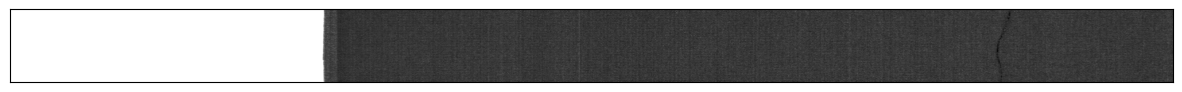

In [ ]:
# Pilih file yang ingin Anda gunakan
file_name = list(uploaded.keys())[0]

# Memuat gamber menggunakan CV2
img = cv2.imread(file_name, 0)  # Gunakan mode '0' untuk citra grayscale

# Fungsi untuk menampilkan citra
def showImage(img):
    plt.figure(figsize=(15, 15))
    plt.imshow(img, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.show()

showImage(img)

3) Memilih Quantization Matrix

 Fungsi ini digunakan untuk memilih dan mengembalikan matriks kuantisasi (quantization matrix) yang sesuai berdasarkan nilai **qName** yang Anda berikan sebagai argumen.

 Matriks kuantisasi adalah matriks yang digunakan dalam proses kompresi citra JPEG untuk mengurangi jumlah informasi dalam citra. Terdapat beberapa matriks kuantisasi yang telah ditentukan sebelumnya dengan kualitas berbeda, seperti Q10, Q50, dan Q90. Nilai **qName** digunakan untuk memilih matriks kuantisasi yang sesuai, dan matriks tersebut akan digunakan dalam proses kompresi citra.

In [ ]:
def selectQMatrix(qName):
    Q10 = np.array([[80,60,50,80,120,200,255,255],
                [55,60,70,95,130,255,255,255],
                [70,65,80,120,200,255,255,255],
                [70,85,110,145,255,255,255,255],
                [90,110,185,255,255,255,255,255],
                [120,175,255,255,255,255,255,255],
                [245,255,255,255,255,255,255,255],
                [255,255,255,255,255,255,255,255]])

    Q50 = np.array([[16,11,10,16,24,40,51,61],
                [12,12,14,19,26,58,60,55],
                [14,13,16,24,40,57,69,56],
                [14,17,22,29,51,87,80,62],
                [18,22,37,56,68,109,103,77],
                [24,35,55,64,81,104,113,92],
                [49,64,78,87,103,121,120,101],
                [72,92,95,98,112,100,130,99]])

    Q90 = np.array([[3,2,2,3,5,8,10,12],
                    [2,2,3,4,5,12,12,11],
                    [3,3,3,5,8,11,14,11],
                    [3,3,4,6,10,17,16,12],
                    [4,4,7,11,14,22,21,15],
                    [5,7,11,13,16,12,23,18],
                    [10,13,16,17,21,24,24,21],
                    [14,18,19,20,22,20,20,20]])
    if qName == "Q10":
        return Q10
    elif qName == "Q50":
        return Q50
    elif qName == "Q90":
        return Q90
    else:
        return np.ones((8,8)) #akan mengembalikan nilai asli

4) Menghitung dimensi citra

In [ ]:
height  = len(img) #menghitung tinggi citra
width = len(img[0]) #menghitung lebar citra
sliced = [] # list kosong untuk menyimpan blok citra 8x8
block = 8
print("The image heigh is " +str(height)+", and image width is "+str(width)+" pixels")

The image heigh is 256, and image width is 4096 pixels


5) Memotong citra menjadi blok-blok 8x8 piksel

In [ ]:
#memotong 8x8 pixel
currY = 0 #posisi index X sekarang
for i in range(block,height+1,block): # membagi citra menjadi blok-blok 8x8 piksel secara vertikal.
    currX = 0 #posisi index Y sekarang
    for j in range(block,width+1,block): # membagi citra menjadi blok-blok 8x8 piksel secara Horizontal.
        sliced.append(img[currY:i,currX:j]-np.ones((8,8))*128) # nilai 128 dikurangkan dari semua piksel dalam blok ini dengan cara mengurangkan matriks 8x8 yang berisi angka 128 dari blok citra tersebut
        currX = j
    currY = i

print("Size of the sliced image: "+str(len(sliced)))
print("Each elemend of sliced list contains a "+ str(sliced[0].shape)+ " element.")

Size of the sliced image: 16384
Each elemend of sliced list contains a (8, 8) element.


6) mengonversi setiap elemen dalam list sliced ke tipe data np.float32

In [ ]:
imf = [np.float32(img) for img in sliced]

7) Menerapkan Discrete Cosine Transform pada setiap blok Citra

In [ ]:
DCToutput = [] #List yang digunakan untuk menyimpan hasil DCT
for part in imf: #Perulangan untuk mengiterasi melalui setiap blok citra dalam list imf
    currDCT = cv2.dct(part) #Menerapkan DCT pada blok citra
    DCToutput.append(currDCT) #Hasil dari DCT
DCToutput[0][0] #mengakses elemen pertama dari hasil DCT

array([1016.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
      dtype=float32)

Secara keseluruhan, kode ini menghasilkan hasil DCT dari setiap blok citra dalam imf dan mengakses nilai DCT pada frekuensi terendah dari blok citra pertama dalam list DCToutput. Hasil DCT ini biasanya digunakan dalam proses kompresi citra, pemrosesan citra, atau analisis frekuensi citra.

8) Melakukan Proses kuantisasi

In [ ]:
selectedQMatrix = selectQMatrix("Q10") #Memilih matriks kuantitasi yang digunakan
for ndct in DCToutput:
    for i in range(block): #Menginterasi melalui baris dari blok hasil DCT
        for j in range(block): #Menginterasi melalui kolom dari blok hasil DCT
            ndct[i,j] = np.around(ndct[i,j]/selectedQMatrix[i,j]) #Mengaplikasikan proses kuantisasi pada setiap elemen DCT dalam blok.
DCToutput[0][0] #mengakses elemen pertama dari hasil DCT

array([13.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

9) Melakukan Invers Discrete Cosine Transform unruk mengembalikan blok DCT yang telah di-quantze ke bentuk semula

In [ ]:
invList = [] # List untuk menyimpan hasil IDCT
for ipart in DCToutput:
    curriDCT = cv2.idct(ipart) #Menerapkan IDCT pada blok sesuai ipart
    invList.append(curriDCT) #Hasil IDCT dimasukan ke invList
invList[0][0] #Mengakses elemen pertama dari IDCT

array([1.625, 1.625, 1.625, 1.625, 1.625, 1.625, 1.625, 1.625],
      dtype=float32)

Secara keseluruhan, kode ini menghasilkan hasil IDCT dari setiap blok DCT yang telah dikuantisasi dalam list DCToutput. Hasil IDCT ini merupakan representasi aproksimasi dari blok-blok citra asli sebelum dilakukan proses kompresi. Proses IDCT ini penting dalam dekompresi citra JPEG untuk mengembalikan citra ke bentuk semula setelah proses kuantisasi yang dilakukan dalam kompresi.

10) menggabungkan blok-blok hasil IDCT menjadi citra lengkap setelah proses dekompresi citra

In [ ]:
row = 0 #Melacak indeks baris saat ini
rowNcol = [] #List untuk menyimpan hasil IDCT + baris" Citra
for j in range(int(width/block),len(invList)+1,int(width/block)): #mengatur penggabungan blok-blok IDCT menjadi baris-baris dalam citra
    rowNcol.append(np.hstack((invList[row:j]))) #baris baru dalam citra yang sedang dibentuk
    row = j #menandai indeks baris saat ini sebelum loop selanjutnya dimulai.
res = np.vstack((rowNcol)) #blok IDCT digabungkan menjadi baris (rowNcol) dan digabungkan secara vertikal (np.vstack)

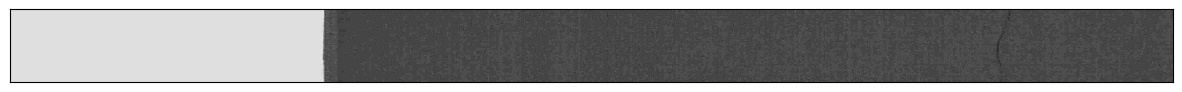

In [ ]:
showImage(res) #Menampilkan citra yang telah dikompresi

Saya telah berhasil melakukan Image Transform dengan menggunakan Discrete Cosine Transform. Untuk referensinya bisa dilihat pada [Image Processing: Image Compression using DCT - Kaggle](https://www.kaggle.com/code/siddheshmahajan/image-processing-image-compression-using-dct/notebook#2017BEC047) 📊📈